# BTC Prediction (EDA Stage)

## This Notebook Contains:
- An exploratory data analysis (EDA) of the BTC prices DataFrame.
- Visual representations of data distributions and relationships.
- Insights that will inform the modeling process.
- Storytelling around the context and significance of BTC prediction.

---

## Storytelling

Bitcoin (BTC) and cryptocurrencies as a whole constitute a relatively new *asset class*, gaining recognition from investors and institutions worldwide. As an emerging market, the behavior of BTC prices and exchange rates remains largely unpredictable, characterized by significant volatility. This volatility presents numerous opportunities for profit for traders and investors.

Through graphical exploration, we aim to understand what features influence BTC price movements. Identifying these key drivers enables us to develop models to predict future prices effectively. The insights gained during this analysis will guide us in designing data architectures suitable for accurate forecasting. 

Our ultimate goal is to leverage this understanding to build reliable prediction models, and this exploratory stage is crucial in uncovering the most informative features and patterns within the data.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
# Load data
df = pd.read_csv("../data/btc_prediction_datawranglingStage.csv")
df.tail()

,Date,open,high,low,close,volume,rsi,ema_long,ema_short,obv,close_nextday
2103,2025-06-11,110274.39,110392.01,108064.00,108645.12,13115.92,58.529152,102270.854128,106231.454684,-1.185512e+06,105671.73
2104,2025-06-12,108645.13,108813.55,105671.72,105671.73,17778.67,50.607683,102404.221810,106178.147572,-1.203291e+06,106066.59
2105,2025-06-13,105671.74,106179.53,102664.31,106066.59,26180.82,51.545554,102547.844092,106167.523041,-1.177110e+06,105414.64
2106,2025-06-14,106066.59,106252.00,104300.00,105414.64,8798.94,49.862067,102660.267461,106095.819894,-1.185909e+06,105594.01
2107,2025-06-15,105414.63,106128.57,104494.53,105594.01,7164.20,50.342600,102775.316188,106048.028476,-1.178745e+06,106390.64


In [55]:
df.shape

(2108, 11)

In [56]:
mean = round(np.mean(df.close), 2)
std = round(np.std(df.close, ddof=1),2)
print('Mean:', mean,
      '\nStd:', std)


Mean: 39415.1 
Std: 26441.7


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2108 non-null   object 
 1   open           2108 non-null   float64
 2   high           2108 non-null   float64
 3   low            2108 non-null   float64
 4   close          2108 non-null   float64
 5   volume         2108 non-null   float64
 6   rsi            2108 non-null   float64
 7   ema_long       2108 non-null   float64
 8   ema_short      2108 non-null   float64
 9   obv            2108 non-null   float64
 10  close_nextday  2108 non-null   float64
dtypes: float64(10), object(1)
memory usage: 181.3+ KB


In [58]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
# Set Date as index
df.set_index('Date', inplace=True)

In [60]:
# Display basic info
print("Data Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2108 entries, 2019-09-08 to 2025-06-15
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           2108 non-null   float64
 1   high           2108 non-null   float64
 2   low            2108 non-null   float64
 3   close          2108 non-null   float64
 4   volume         2108 non-null   float64
 5   rsi            2108 non-null   float64
 6   ema_long       2108 non-null   float64
 7   ema_short      2108 non-null   float64
 8   obv            2108 non-null   float64
 9   close_nextday  2108 non-null   float64
dtypes: float64(10)
memory usage: 181.2 KB
None

First 5 rows:
                open      high      low     close    volume        rsi  \
Date                                                                     
2019-09-08  10455.90  10592.50  10208.0  10381.18  23984.67  50.859884   
2019-09-09  10381.24  10480.00  10068.5  10303.12  

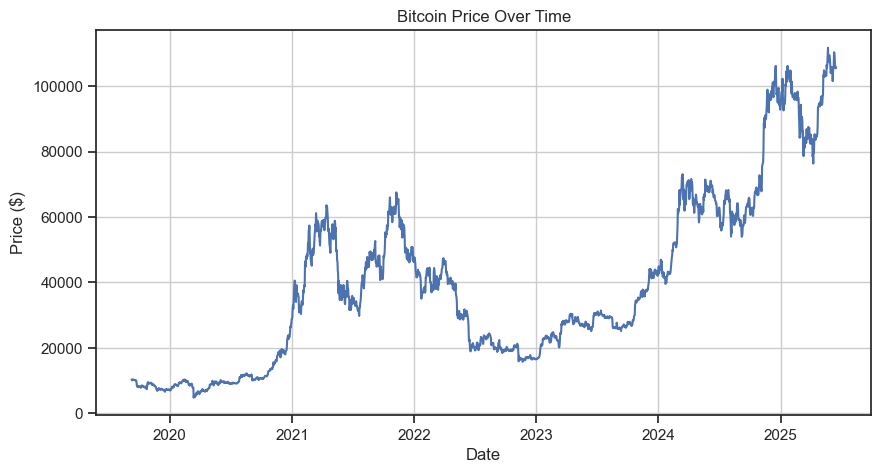

In [63]:
# 1. Basic Price Chart
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'])
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

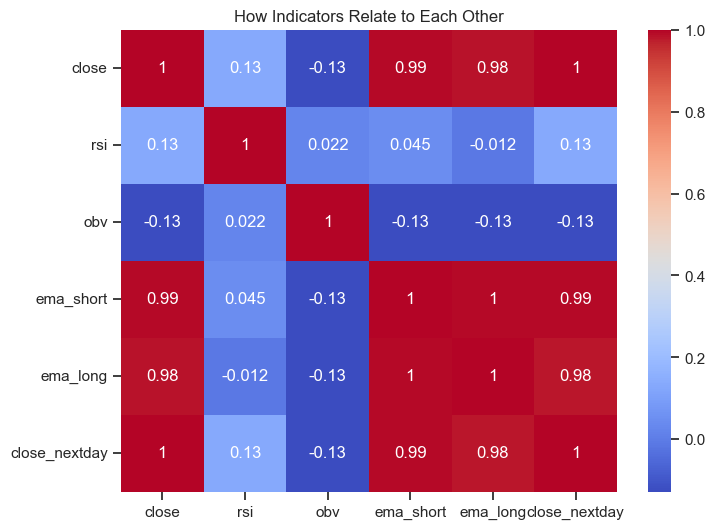

In [64]:
#  Simple Correlation Heatmap (just key indicators)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['close', 'rsi', 'obv', 'ema_short', 'ema_long', 'close_nextday']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('How Indicators Relate to Each Other')
plt.show()

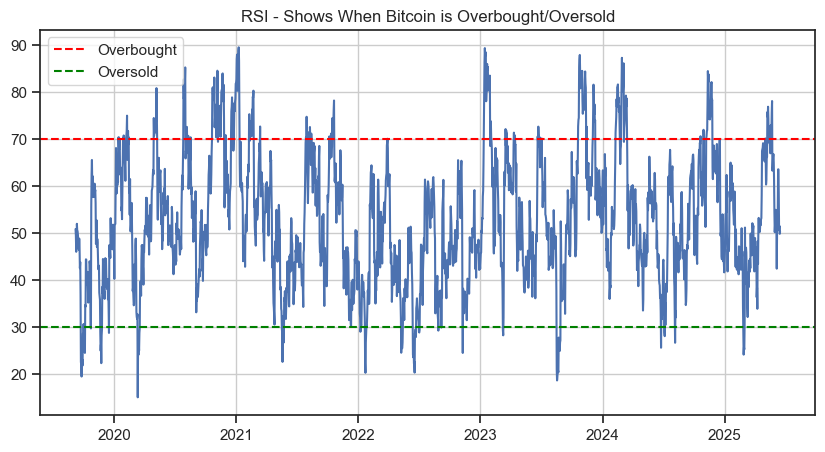

In [65]:
#  RSI Indicator
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['rsi'])
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI - Shows When Bitcoin is Overbought/Oversold')
plt.legend()
plt.grid()
plt.show()

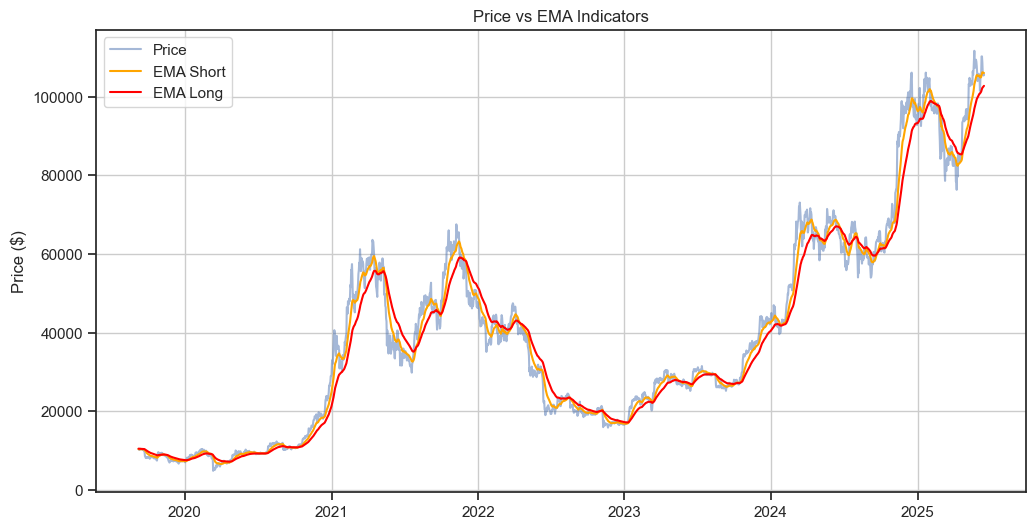

In [68]:
# ema analysis
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Price', alpha=0.5)
plt.plot(df.index, df['ema_short'], label='EMA Short', color='orange')
plt.plot(df.index, df['ema_long'], label='EMA Long', color='red')
plt.title('Price vs EMA Indicators')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

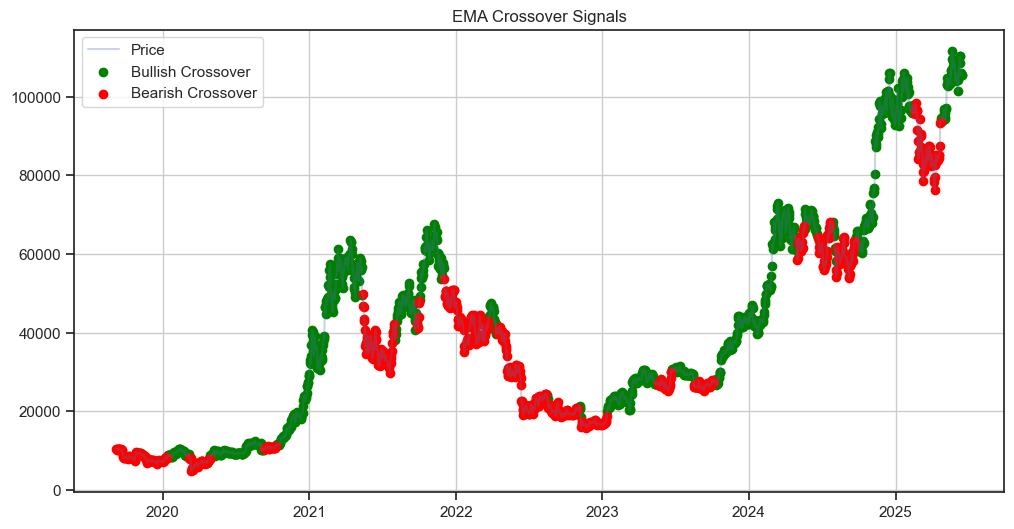

In [70]:

# EMA Crossover Signals
df['ema_crossover'] = np.where(df['ema_short'] > df['ema_long'], 1, -1)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Price', alpha=0.3)
plt.scatter(df.index[df['ema_crossover'] == 1], 
            df['close'][df['ema_crossover'] == 1], 
            color='green', label='Bullish Crossover')
plt.scatter(df.index[df['ema_crossover'] == -1], 
            df['close'][df['ema_crossover'] == -1], 
            color='red', label='Bearish Crossover')
plt.title('EMA Crossover Signals')
plt.legend()
plt.grid()
plt.show()

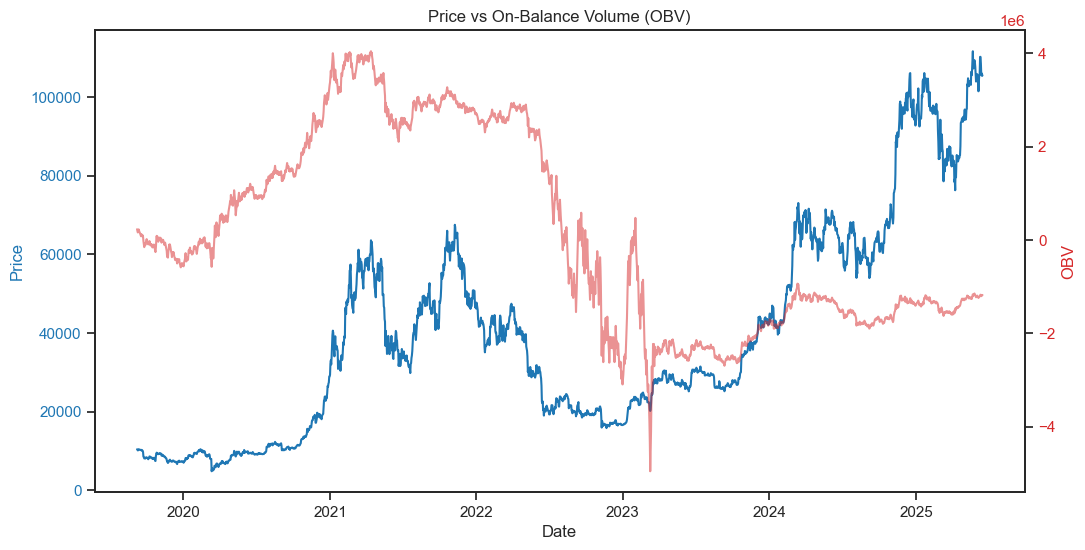

In [72]:
#obv analysis
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(df.index, df['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('OBV', color=color)
ax2.plot(df.index, df['obv'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Price vs On-Balance Volume (OBV)')
plt.show()

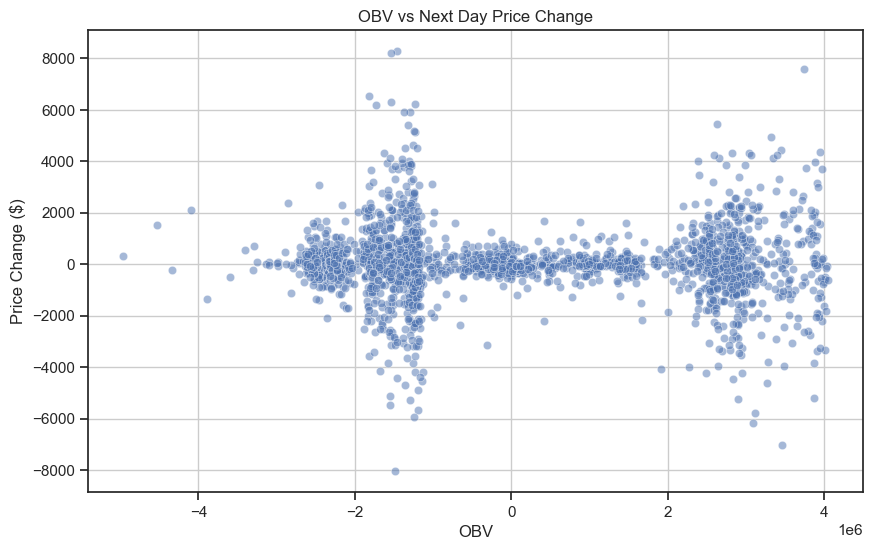

In [73]:
# OBV vs Price Change
df['price_change'] = df['close_nextday'] - df['close']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['obv'], y=df['price_change'], alpha=0.5)
plt.title('OBV vs Next Day Price Change')
plt.xlabel('OBV')
plt.ylabel('Price Change ($)')
plt.grid()
plt.show()

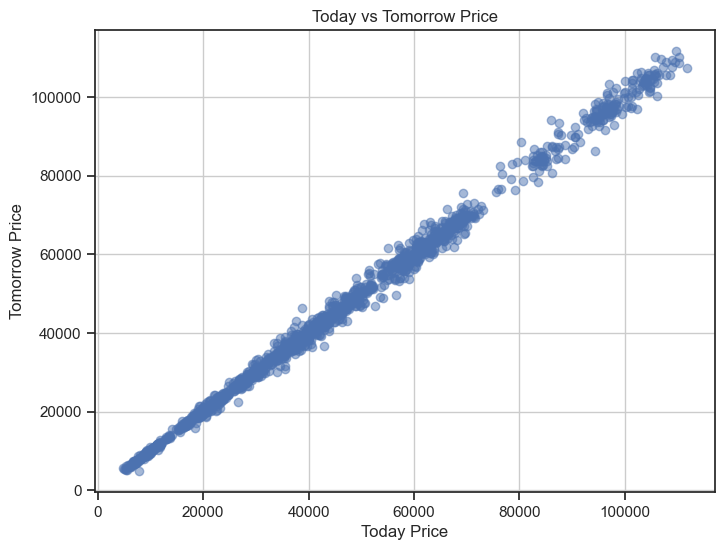

In [47]:
#  Price vs Next Day Price
plt.figure(figsize=(8, 6))
plt.scatter(df['close'], df['close_nextday'], alpha=0.5)
plt.title('Today vs Tomorrow Price')
plt.xlabel('Today Price')
plt.ylabel('Tomorrow Price')
plt.grid()
plt.show()

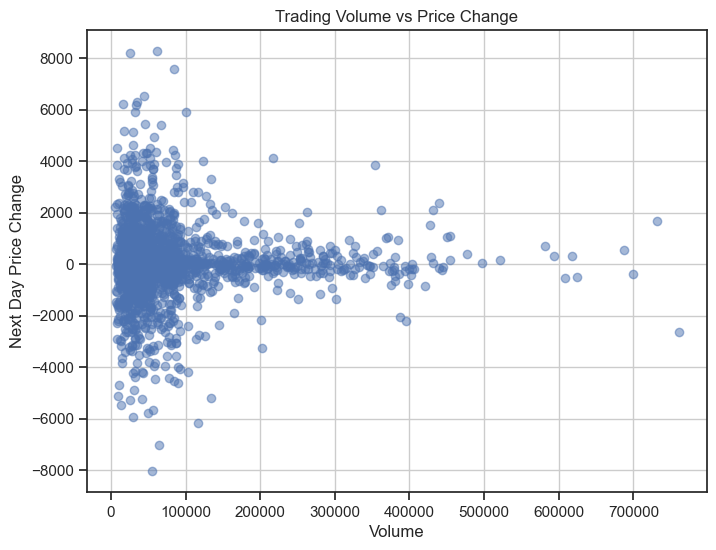

In [51]:
#  Volume vs Price Changes
df['price_change'] = df['close_nextday'] - df['close']
plt.figure(figsize=(8, 6))
plt.scatter(df['volume'], df['price_change'], alpha=0.5)
plt.title('Trading Volume vs Price Change')
plt.xlabel('Volume')
plt.ylabel('Next Day Price Change')
plt.grid()
plt.show()